In [ ]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import ast

# Load dataset
papers = pd.read_csv("/content/3_eligible_publications_narrow.csv", sep=",", encoding='latin-1')
papers

,Journal,Title,DEC,Tag1,Tag2,Authors,Year,Abstract,Paper_type,Affiliations
0,Journal of Parasitology Research,Larvicidal Activity against Aedes aegypti and ...,A,1C,Algae,"Guedes, ElÃÂ­ca Amara CecÃÂ­lia; de Carvalho...",2014.0,This study investigated the biological activit...,['Journal Article'],"['LaboratÃÂ³rio de Produtos Naturais, Institu..."
1,Marine Drugs,Biological Activities and Chemical Composition...,A,1A,Algae,"Pereira, Hugo; CustÃ³dio, LuÃ­sa; Rodrigues, M...",2015.0,Four lipid-rich microalgal species from the Re...,['Journal Article'],"['Centre of Marine Sciences, University of Alg..."
2,Marine Drugs,The Brown Alga Stypopodium zonale (Dictyotacea...,A,1A,Algae,"Soares, Deivid Costa; Szlachta, Marcella Maced...",2016.0,This study evaluated the anti-Leishmania amazo...,['Journal Article'],"['Instituto de Microbiologia Paulo de GÃ³es, U..."
3,Marine Drugs,"Spiralyde A, an Antikinetoplastid Dolabellane ...",A,1A,Algae,"Chiboub, Olfa; Sifaoui, Ines; Lorenzo-Morales,...",2019.0,Bioassay-guided fractionation of the antikinet...,['Journal Article'],['Instituto Universitario de Bio-OrgÃÂ¡nica A...
4,Parasites & Vectors,Apoptosis-like cell death upon kinetoplastid i...,A,1A,Algae,"Chiboub, Olfa; Sifaoui, Ines; Abderrabba, Mane...",2021.0,Background: The in vitro activity of the brown...,['Journal Article'],['grid.10041.340000000121060879Instituto Unive...
...,...,...,...,...,...,...,...,...,...,...
414,Plants,In Vitro Antiprotozoal Activity of Schinus mol...,A,1A,Plant extract,"RodrÃ­guez-Garza, Nancy E.; Quintanilla-Licea,...",2024.0,"Chagas disease, caused by the protozoan Trypan...",['Journal Article'],['Laboratorio de PatologÃ­a Molecular y Experi...
415,Tropical Parasitology,Investigation the effect of the aqueous extrac...,A,1A,Plant extract,"Ghusoon, A. A Al-Maphregy; Buthaina, A. H. Al-...",2024.0,Background:: Visceral leishmaniasis (VL) is a ...,['Journal Article'],"['Department of Biology, College of Education ..."
416,Heliyon,Leishmanicidal and immunomodulatory activity o...,A,1A,Plant extract,"de AraÃºjo, Sandra Alves; Silva, Carla Maria P...",2024.0,Leishmaniases are infectious-parasitic disease...,['Journal Article'],"['Rede Nordeste de Biotecnologia, Universidade..."
417,BMC Complementary Medicine and Therapies,Therapeutic potential of Indonesian plant extr...,A,1A,Plant extract,"Sari, Defi Kartika; Jeelani, Ghulam; Ilmi, Hil...",2024.0,Background: Neglected tropical diseases (NTDs)...,['Journal Article'],['https://ror.org/04ctejd88grid.440745.60000 0...


In [ ]:
# Define function for classification
def classify_labels(text):
    labels = []
    patterns = {
        "Africa": [r"(?i)\b{}\b".format(country) for country in [
            "Algeria", "Algerie", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cameroon", "Cape Verde",
            "Central African Republic", "Chad", "Comoros", "Congo", "Djibouti", "Egypt", "Equatorial Guinea",
            "Eritrea", "Eswatini", "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau",
            "Ivory Coast", "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", "Malawi", "Mali",
            "Mauritania", "Mauritius", "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda",
            "Sao Tome and Principe", "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa",
            "South Sudan", "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe", "Cote d'ivoire"
        ]],
        "Asia": [r"(?i)\b{}\b".format(country) for country in [
            "Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan", "Brunei", "Cambodia",
            "China", "Cyprus", "Georgia", "India", "Indonesia", "Iran", "Iraq", "Israel", "Japan", "Jordan",
            "Kazakhstan", "Kuwait", "Kyrgyzstan", "Laos", "Lebanon", "Malaysia", "Maldives", "Mongolia",
            "Myanmar", "Nepal", "North Korea", "Oman", "Pakistan", "Palestine", "Philippines", "Qatar",
            "Saudi Arabia", "Singapore", "South Korea", "Sri Lanka", "Syria", "Tajikistan", "Thailand",
            "Turkey", "Turkmenistan", "United Arab Emirates", "Uzbekistan", "Vietnam", "Yemen"
        ]],
        "Europe": [r"(?i)\b{}\b".format(country) for country in [
            "Albania", "Andorra", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina", "Bulgaria", "Croatia",
            "Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary",
            "Iceland", "Ireland", "Italy", "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", "Malta",
            "Moldova", "Monaco", "Montenegro", "Netherlands", "North Macedonia", "Norway", "Poland", "Portugal",
            "Romania", "Russia", "San Marino", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland",
            "Ukraine", "United Kingdom", "UK"
        ]],
        "North America": [r"(?i)\b{}\b".format(country) for country in [
            "Antigua and Barbuda", "Bahamas", "Barbados", "Belize", "Canada", "Costa Rica", "Cuba", "Dominica",
            "Dominican Republic", "El Salvador", "Grenada", "Guatemala", "Haiti", "Honduras", "Jamaica", "Mexico",
            "Nicaragua", "Panama", "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines",
            "Trinidad and Tobago", "United States", "USA", "US", "México"
        ]],
        "South America": [r"(?i)\b{}\b".format(country) for country in [
            "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Guyana", "Paraguay", "Peru",
            "Suriname", "Uruguay", "Venezuela", "Brasil", ""
        ]],
        "Oceania": [r"(?i)\b{}\b".format(country) for country in [
            "Australia", "Fiji", "Kiribati", "Marshall Islands", "Micronesia", "Nauru", "New Zealand", "Palau",
            "Papua New Guinea", "Samoa", "Solomon Islands", "Tonga", "Tuvalu", "Vanuatu"
        ]]
    }

    for label, regex_list in patterns.items():
        if any(re.search(pattern, text) for pattern in regex_list):
            labels.append(label)

    return labels

# Apply classification
if "Affiliations" in papers.columns:
    papers["Labels"] = papers["Affiliations"].fillna("").apply(classify_labels)
else:
    raise ValueError("Error: The 'Affiliations' column does not exist in the DataFrame.")

In [ ]:
# Save the updated DataFrame with the Labels column
output_path = '/content/5_updated_affiliations_with_labels.csv'
papers.to_csv(output_path, index=False)
print(f"Processed data saved to {output_path}")

Processed data saved to /content/5_updated_affiliations_with_labels.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
# Load the dataset with classifications
papers = pd.read_csv("/content/5_updated_affiliations_with_labels.csv", sep=",", encoding='latin-1')
papers

,Journal,Title,DEC,Tag1,Tag2,Authors,Year,Abstract,Paper_type,Affiliations,Labels
0,Journal of Parasitology Research,Larvicidal Activity against Aedes aegypti and ...,A,1C,Algae,"Guedes, ElÃÂÃÂ­ca Amara CecÃÂÃÂ­lia; de ...",2014.0,This study investigated the biological activit...,['Journal Article'],"['LaboratÃÂÃÂ³rio de Produtos Naturais, Ins...",['South America']
1,Marine Drugs,Biological Activities and Chemical Composition...,A,1A,Algae,"Pereira, Hugo; CustÃÂ³dio, LuÃÂ­sa; Rodrigue...",2015.0,Four lipid-rich microalgal species from the Re...,['Journal Article'],"['Centre of Marine Sciences, University of Alg...","['Asia', 'Europe', 'South America']"
2,Marine Drugs,The Brown Alga Stypopodium zonale (Dictyotacea...,A,1A,Algae,"Soares, Deivid Costa; Szlachta, Marcella Maced...",2016.0,This study evaluated the anti-Leishmania amazo...,['Journal Article'],"['Instituto de Microbiologia Paulo de GÃÂ³es,...",['South America']
3,Marine Drugs,"Spiralyde A, an Antikinetoplastid Dolabellane ...",A,1A,Algae,"Chiboub, Olfa; Sifaoui, Ines; Lorenzo-Morales,...",2019.0,Bioassay-guided fractionation of the antikinet...,['Journal Article'],['Instituto Universitario de Bio-OrgÃÂÃÂ¡ni...,"['Africa', 'Europe', 'South America']"
4,Parasites & Vectors,Apoptosis-like cell death upon kinetoplastid i...,A,1A,Algae,"Chiboub, Olfa; Sifaoui, Ines; Abderrabba, Mane...",2021.0,Background: The in vitro activity of the brown...,['Journal Article'],['grid.10041.340000000121060879Instituto Unive...,"['Africa', 'Europe', 'South America']"
...,...,...,...,...,...,...,...,...,...,...,...
414,Plants,In Vitro Antiprotozoal Activity of Schinus mol...,A,1A,Plant extract,"RodrÃÂ­guez-Garza, Nancy E.; Quintanilla-Lice...",2024.0,"Chagas disease, caused by the protozoan Trypan...",['Journal Article'],['Laboratorio de PatologÃÂ­a Molecular y Expe...,"['North America', 'South America']"
415,Tropical Parasitology,Investigation the effect of the aqueous extrac...,A,1A,Plant extract,"Ghusoon, A. A Al-Maphregy; Buthaina, A. H. Al-...",2024.0,Background:: Visceral leishmaniasis (VL) is a ...,['Journal Article'],"['Department of Biology, College of Education ...","['Asia', 'South America']"
416,Heliyon,Leishmanicidal and immunomodulatory activity o...,A,1A,Plant extract,"de AraÃÂºjo, Sandra Alves; Silva, Carla Maria...",2024.0,Leishmaniases are infectious-parasitic disease...,['Journal Article'],"['Rede Nordeste de Biotecnologia, Universidade...",['South America']
417,BMC Complementary Medicine and Therapies,Therapeutic potential of Indonesian plant extr...,A,1A,Plant extract,"Sari, Defi Kartika; Jeelani, Ghulam; Ilmi, Hil...",2024.0,Background: Neglected tropical diseases (NTDs)...,['Journal Article'],['https://ror.org/04ctejd88grid.440745.60000 0...,"['Asia', 'South America']"


In [ ]:
# Convert Labels back to list
papers["Labels"] = papers["Labels"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# Check if Year column exists
if "Year" not in papers.columns:
    raise ValueError("Error: The 'Year' column does not exist in the DataFrame.")

# Filter years
papers = papers[(papers["Year"] >= 2000) & (papers["Year"] <= 2025)]

# Count publications by continent per year
continent_year_counts = {continent: [] for continent in ["Africa", "Asia", "Europe", "North America", "Oceania", "South America"]}
years = range(2000, 2025)

for year in years:
    year_data = papers[papers["Year"] == year]
    label_counts = Counter(label for labels in year_data["Labels"] for label in labels)
    for continent in continent_year_counts.keys():
        continent_year_counts[continent].append(label_counts.get(continent, 0))

# Create DataFrame for visualization
plot_data = pd.DataFrame({
    "Year": list(years) * len(continent_year_counts),
    "Publications": [count for counts in continent_year_counts.values() for count in counts],
    "Continent": [continent for continent, counts in continent_year_counts.items() for _ in counts]
})

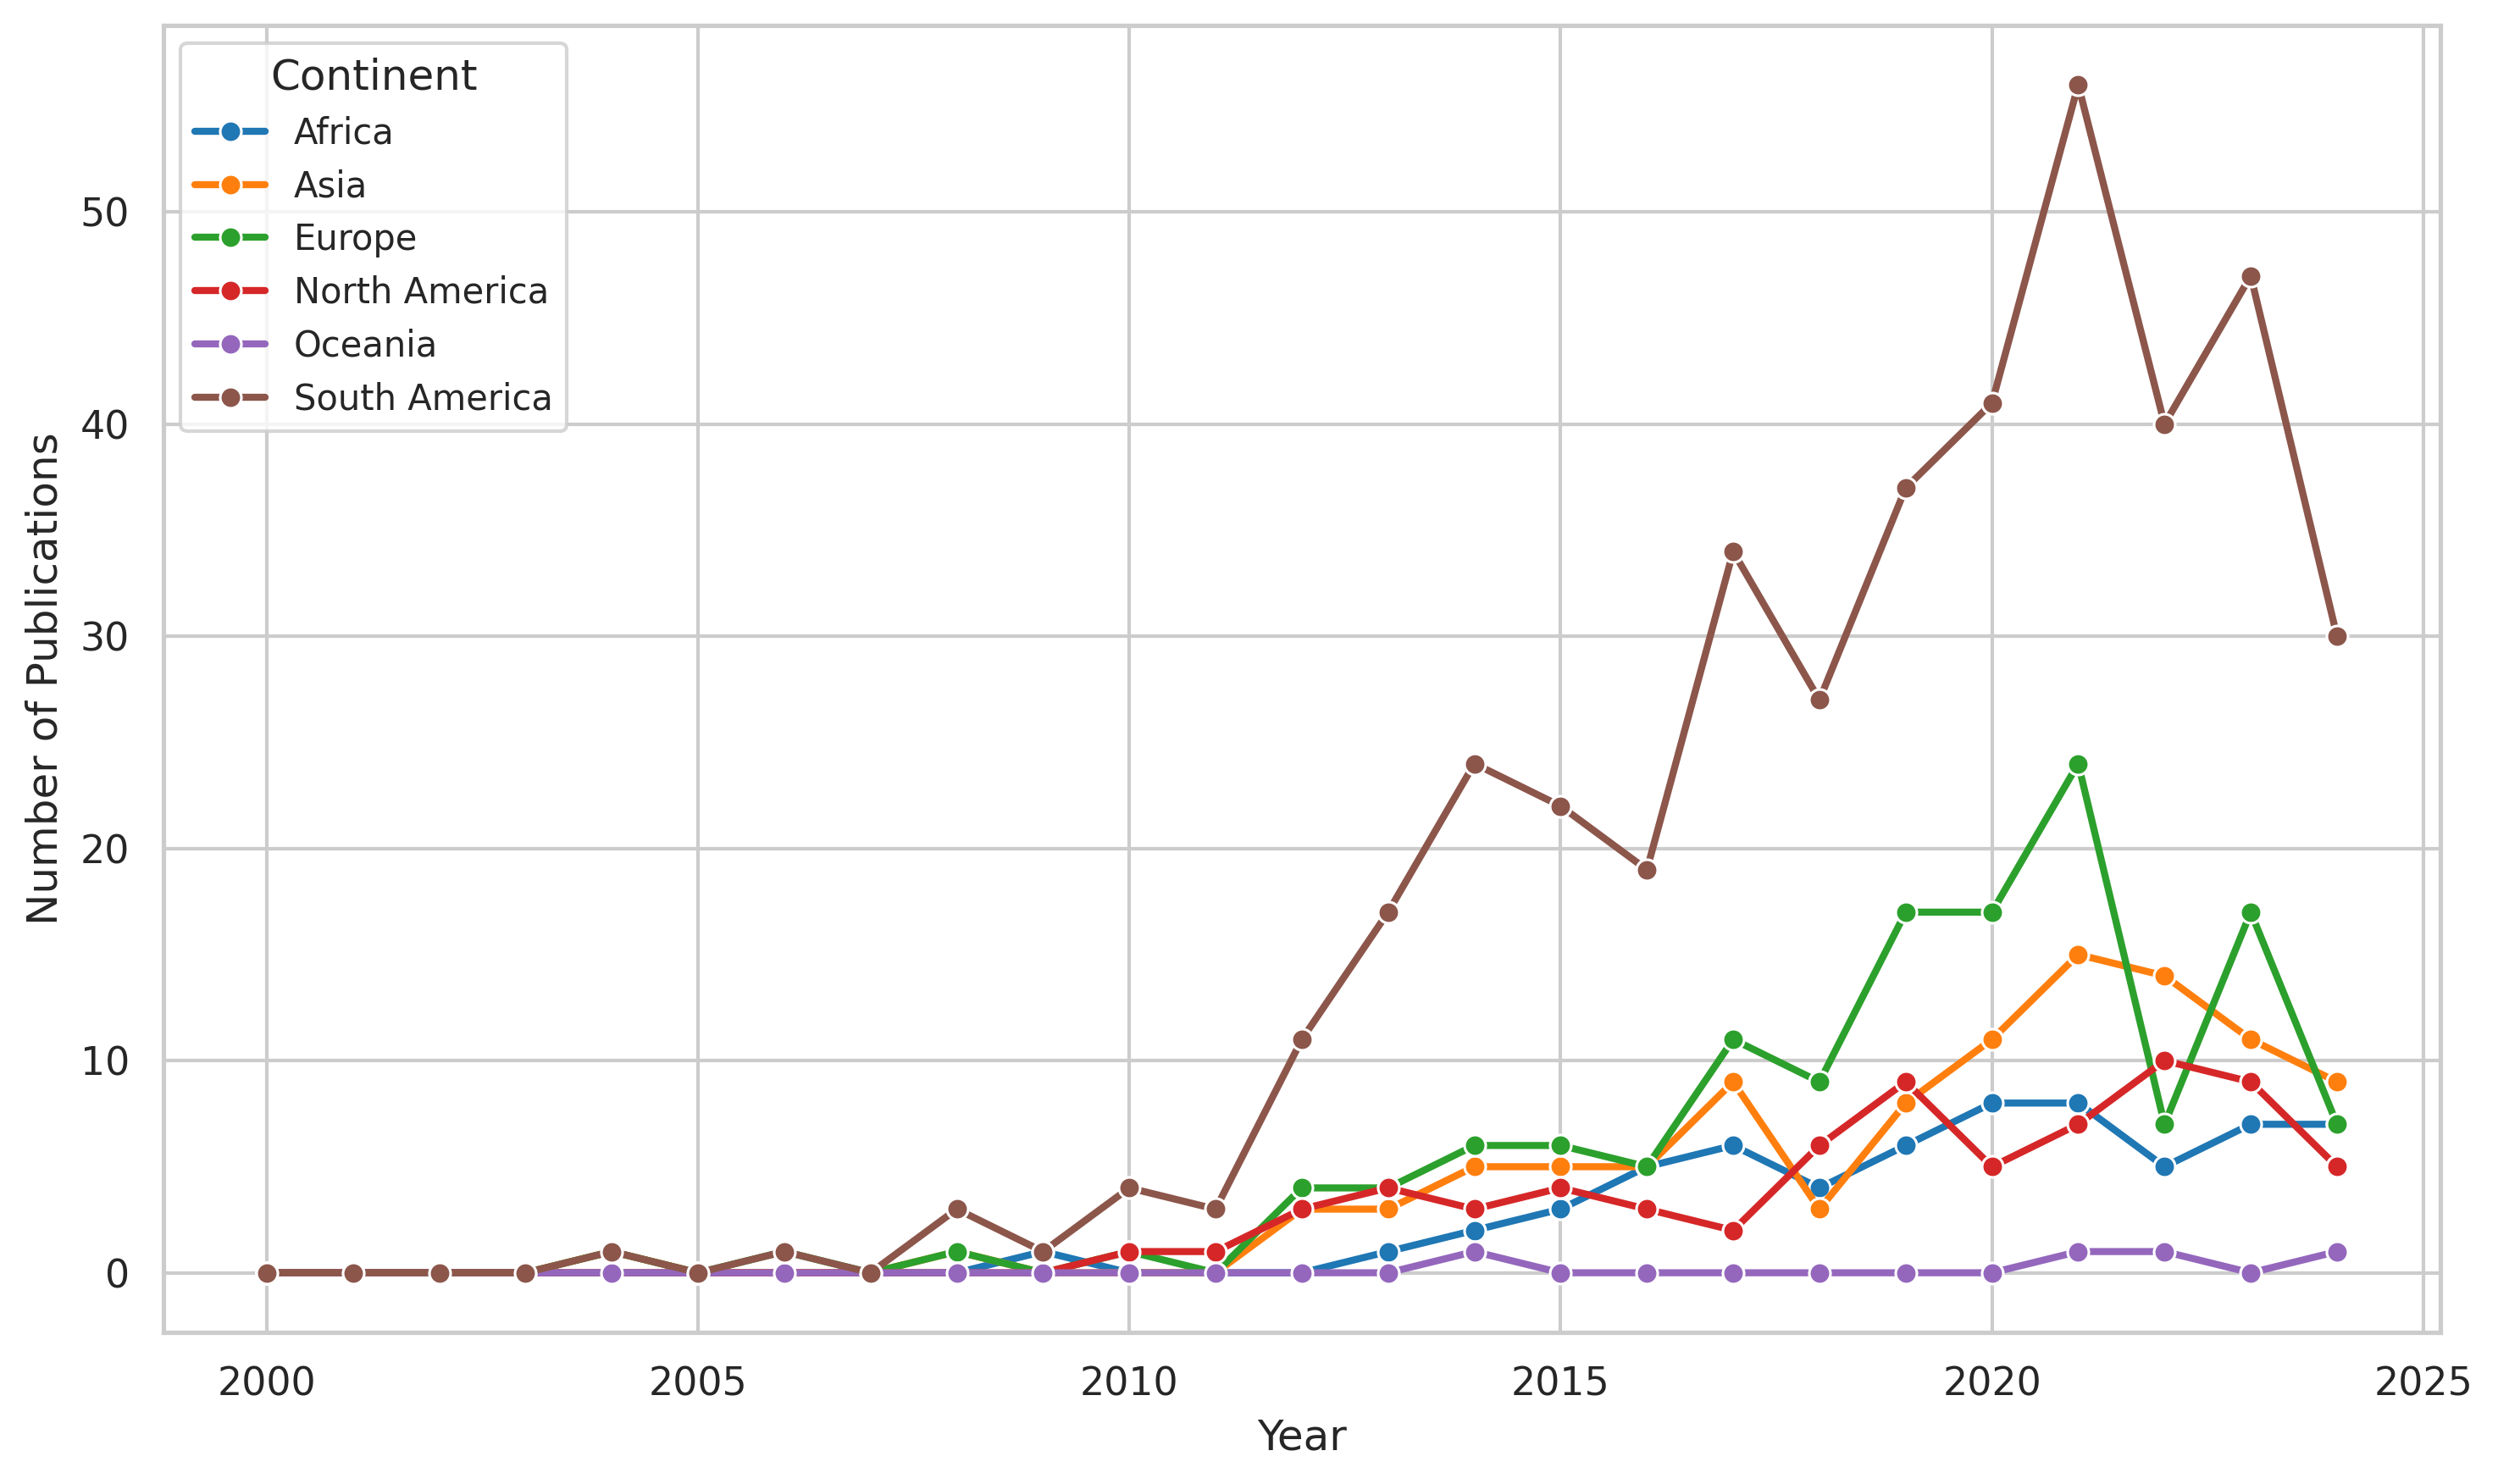

In [ ]:
# Plot using Seaborn
sns.set(style="whitegrid", palette="tab10")
plt.figure(figsize=(10, 6), dpi = 300)
sns.lineplot(
    data=plot_data,
    x="Year",
    y="Publications",
    hue="Continent",
    marker="o",
    linewidth=2
)

# Customize plot
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Publications", fontsize=12)
#plt.title("Publication Trends by Continent (2000–2025)")
plt.legend(title="Continent", fontsize=10)
plt.tight_layout()
plt.show()

COUNTRIES

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Load data
data = pd.read_csv("/content/3_eligible_publications_narrow.csv", sep=",", encoding="latin-1")
data

,Journal,Title,DEC,Tag1,Tag2,Authors,Year,Abstract,Paper_type,Affiliations
0,Journal of Parasitology Research,Larvicidal Activity against Aedes aegypti and ...,A,1C,Algae,"Guedes, ElÃÂ­ca Amara CecÃÂ­lia; de Carvalho...",2014.0,This study investigated the biological activit...,['Journal Article'],"['LaboratÃÂ³rio de Produtos Naturais, Institu..."
1,Marine Drugs,Biological Activities and Chemical Composition...,A,1A,Algae,"Pereira, Hugo; CustÃ³dio, LuÃ­sa; Rodrigues, M...",2015.0,Four lipid-rich microalgal species from the Re...,['Journal Article'],"['Centre of Marine Sciences, University of Alg..."
2,Marine Drugs,The Brown Alga Stypopodium zonale (Dictyotacea...,A,1A,Algae,"Soares, Deivid Costa; Szlachta, Marcella Maced...",2016.0,This study evaluated the anti-Leishmania amazo...,['Journal Article'],"['Instituto de Microbiologia Paulo de GÃ³es, U..."
3,Marine Drugs,"Spiralyde A, an Antikinetoplastid Dolabellane ...",A,1A,Algae,"Chiboub, Olfa; Sifaoui, Ines; Lorenzo-Morales,...",2019.0,Bioassay-guided fractionation of the antikinet...,['Journal Article'],['Instituto Universitario de Bio-OrgÃÂ¡nica A...
4,Parasites & Vectors,Apoptosis-like cell death upon kinetoplastid i...,A,1A,Algae,"Chiboub, Olfa; Sifaoui, Ines; Abderrabba, Mane...",2021.0,Background: The in vitro activity of the brown...,['Journal Article'],['grid.10041.340000000121060879Instituto Unive...
...,...,...,...,...,...,...,...,...,...,...
414,Plants,In Vitro Antiprotozoal Activity of Schinus mol...,A,1A,Plant extract,"RodrÃ­guez-Garza, Nancy E.; Quintanilla-Licea,...",2024.0,"Chagas disease, caused by the protozoan Trypan...",['Journal Article'],['Laboratorio de PatologÃ­a Molecular y Experi...
415,Tropical Parasitology,Investigation the effect of the aqueous extrac...,A,1A,Plant extract,"Ghusoon, A. A Al-Maphregy; Buthaina, A. H. Al-...",2024.0,Background:: Visceral leishmaniasis (VL) is a ...,['Journal Article'],"['Department of Biology, College of Education ..."
416,Heliyon,Leishmanicidal and immunomodulatory activity o...,A,1A,Plant extract,"de AraÃºjo, Sandra Alves; Silva, Carla Maria P...",2024.0,Leishmaniases are infectious-parasitic disease...,['Journal Article'],"['Rede Nordeste de Biotecnologia, Universidade..."
417,BMC Complementary Medicine and Therapies,Therapeutic potential of Indonesian plant extr...,A,1A,Plant extract,"Sari, Defi Kartika; Jeelani, Ghulam; Ilmi, Hil...",2024.0,Background: Neglected tropical diseases (NTDs)...,['Journal Article'],['https://ror.org/04ctejd88grid.440745.60000 0...


In [ ]:
# Ensure necessary columns are present
if "Affiliations" not in data.columns or "Year" not in data.columns:
    raise ValueError("Error: 'Affiliations' or 'Year' column is missing.")

# Filter the data for the specified year range
data = data[(data["Year"] >= 2000) & (data["Year"] <= 2025)]

In [ ]:
# Define a function to extract country from the first author's affiliation
countries = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia",
    "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium",
    "Belize", "Benin", "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria",
    "Burkina Faso", "Burundi", "Cabo Verde", "Cambodia", "Cameroon", "Canada", "Central African Republic", "Chad",
    "Chile", "China", "Colombia", "Comoros", "Congo", "Costa Rica", "Croatia", "Cuba", "Cyprus", "Czech Republic",
    "Democratic Republic of the Congo", "Denmark", "Djibouti", "Dominica", "Dominican Republic", "Ecuador", "Egypt",
    "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia", "Eswatini", "Ethiopia", "Fiji", "Finland", "France",
    "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Greece", "Grenada", "Guatemala", "Guinea", "Guinea-Bissau",
    "Guyana", "Haiti", "Honduras", "Hungary", "Iceland", "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel",
    "Italy", "Jamaica", "Japan", "Jordan", "Kazakhstan", "Kenya", "Kiribati", "Kuwait", "Kyrgyzstan", "Laos",
    "Latvia", "Lebanon", "Lesotho", "Liberia", "Libya", "Liechtenstein", "Lithuania", "Luxembourg", "Madagascar",
    "Malawi", "Malaysia", "Maldives", "Mali", "Malta", "Marshall Islands", "Mauritania", "Mauritius", "Mexico",
    "Micronesia", "Moldova", "Monaco", "Mongolia", "Montenegro", "Morocco", "Mozambique", "Myanmar", "Namibia",
    "Nauru", "Nepal", "Netherlands", "New Zealand", "Nicaragua", "Niger", "Nigeria", "North Korea", "North Macedonia",
    "Norway", "Oman", "Pakistan", "Palau", "Panama", "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Poland",
    "Portugal", "Qatar", "Romania", "Russia", "Rwanda", "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines",
    "Samoa", "San Marino", "Sao Tome and Principe", "Saudi Arabia", "Senegal", "Serbia", "Seychelles", "Sierra Leone",
    "Singapore", "Slovakia", "Slovenia", "Solomon Islands", "Somalia", "South Africa", "South Korea", "South Sudan",
    "Spain", "Sri Lanka", "Sudan", "Suriname", "Sweden", "Switzerland", "Syria", "Taiwan", "Tajikistan", "Tanzania",
    "Thailand", "Timor-Leste", "Togo", "Tonga", "Trinidad and Tobago", "Tunisia", "Turkey", "Turkmenistan", "Tuvalu",
    "Uganda", "Ukraine", "United Arab Emirates", "United Kingdom", "United States", "Uruguay", "Uzbekistan", "Vanuatu",
    "Vatican City", "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe"
]

# Compile regex patterns for efficiency
country_patterns = {country: re.compile(rf"\b{re.escape(country)}\b", re.IGNORECASE) for country in countries}

def extract_country(affiliation):
    """Extracts country from affiliation string."""
    if pd.isna(affiliation) or not isinstance(affiliation, str):
        return "Other"

    first_affiliation = affiliation.split(';')[0]  # Extract the first affiliation if multiple
    for country, pattern in country_patterns.items():
        if pattern.search(first_affiliation):
            return country
    return "Other"

# Apply the function to extract countries
data["Country"] = data["Affiliations"].apply(extract_country)


/tmp/ipython-input-2787719602.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Country"] = data["Affiliations"].apply(extract_country)


In [ ]:
# Save updated dataset
output_path = "/content/6_updated_with_country_column.csv"
data.to_csv(output_path, index=False)
print(f"File saved with new 'Country' column to {output_path}")

File saved with new 'Country' column to /content/6_updated_with_country_column.csv


In [ ]:
data = pd.read_csv("/content/6_updated_with_country_column.csv", sep=",", encoding='latin-1')
data

,Journal,Title,DEC,Tag1,Tag2,Authors,Year,Abstract,Paper_type,Affiliations,Country
0,Journal of Parasitology Research,Larvicidal Activity against Aedes aegypti and ...,A,1C,Algae,"Guedes, ElÃÂÃÂ­ca Amara CecÃÂÃÂ­lia; de ...",2014,This study investigated the biological activit...,['Journal Article'],"['LaboratÃÂÃÂ³rio de Produtos Naturais, Ins...",Brazil
1,Marine Drugs,Biological Activities and Chemical Composition...,A,1A,Algae,"Pereira, Hugo; CustÃÂ³dio, LuÃÂ­sa; Rodrigue...",2015,Four lipid-rich microalgal species from the Re...,['Journal Article'],"['Centre of Marine Sciences, University of Alg...",Portugal
2,Marine Drugs,The Brown Alga Stypopodium zonale (Dictyotacea...,A,1A,Algae,"Soares, Deivid Costa; Szlachta, Marcella Maced...",2016,This study evaluated the anti-Leishmania amazo...,['Journal Article'],"['Instituto de Microbiologia Paulo de GÃÂ³es,...",Brazil
3,Marine Drugs,"Spiralyde A, an Antikinetoplastid Dolabellane ...",A,1A,Algae,"Chiboub, Olfa; Sifaoui, Ines; Lorenzo-Morales,...",2019,Bioassay-guided fractionation of the antikinet...,['Journal Article'],['Instituto Universitario de Bio-OrgÃÂÃÂ¡ni...,Spain
4,Parasites & Vectors,Apoptosis-like cell death upon kinetoplastid i...,A,1A,Algae,"Chiboub, Olfa; Sifaoui, Ines; Abderrabba, Mane...",2021,Background: The in vitro activity of the brown...,['Journal Article'],['grid.10041.340000000121060879Instituto Unive...,Spain
...,...,...,...,...,...,...,...,...,...,...,...
413,Plants,In Vitro Antiprotozoal Activity of Schinus mol...,A,1A,Plant extract,"RodrÃÂ­guez-Garza, Nancy E.; Quintanilla-Lice...",2024,"Chagas disease, caused by the protozoan Trypan...",['Journal Article'],['Laboratorio de PatologÃÂ­a Molecular y Expe...,Mexico
414,Tropical Parasitology,Investigation the effect of the aqueous extrac...,A,1A,Plant extract,"Ghusoon, A. A Al-Maphregy; Buthaina, A. H. Al-...",2024,Background:: Visceral leishmaniasis (VL) is a ...,['Journal Article'],"['Department of Biology, College of Education ...",Iraq
415,Heliyon,Leishmanicidal and immunomodulatory activity o...,A,1A,Plant extract,"de AraÃÂºjo, Sandra Alves; Silva, Carla Maria...",2024,Leishmaniases are infectious-parasitic disease...,['Journal Article'],"['Rede Nordeste de Biotecnologia, Universidade...",Brazil
416,BMC Complementary Medicine and Therapies,Therapeutic potential of Indonesian plant extr...,A,1A,Plant extract,"Sari, Defi Kartika; Jeelani, Ghulam; Ilmi, Hil...",2024,Background: Neglected tropical diseases (NTDs)...,['Journal Article'],['https://ror.org/04ctejd88grid.440745.60000 0...,Indonesia


In [ ]:
# Filter data for the years 2000–2025
data = data[(data["Year"] >= 2000) & (data["Year"] <= 2025)]

# Group by year and country to count publications
grouped = data.groupby(["Year", "Country"]).size().reset_index(name="Count")

# Identify top 20 countries by total contributions
top_countries = grouped.groupby("Country")["Count"].sum().nlargest(20).index.tolist()
top_countries

['Brazil',
 'India',
 'Germany',
 'Iran',
 'Argentina',
 'United States',
 'Spain',
 'Mexico',
 'Colombia',
 'Cuba',
 'Ethiopia',
 'Pakistan',
 'Saudi Arabia',
 'United Kingdom',
 'Belgium',
 'Egypt',
 'Nigeria',
 'Cameroon',
 'Ghana',
 'Italy']

In [ ]:
# Filter data for the top countries
filtered = grouped[grouped["Country"].isin(top_countries)]

# Calculate yearly total publications for normalization
#yearly_totals = grouped.groupby("Year")["Count"].sum().reset_index(name="Yearly_Total")
#filtered = filtered.merge(yearly_totals, on="Year")
#filtered["Relative_Contribution"] = (filtered["Count"] / filtered["Yearly_Total"]) * 100

In [ ]:
#!pip install numpy
import numpy as np # Import numpy and assign it to the alias 'np'

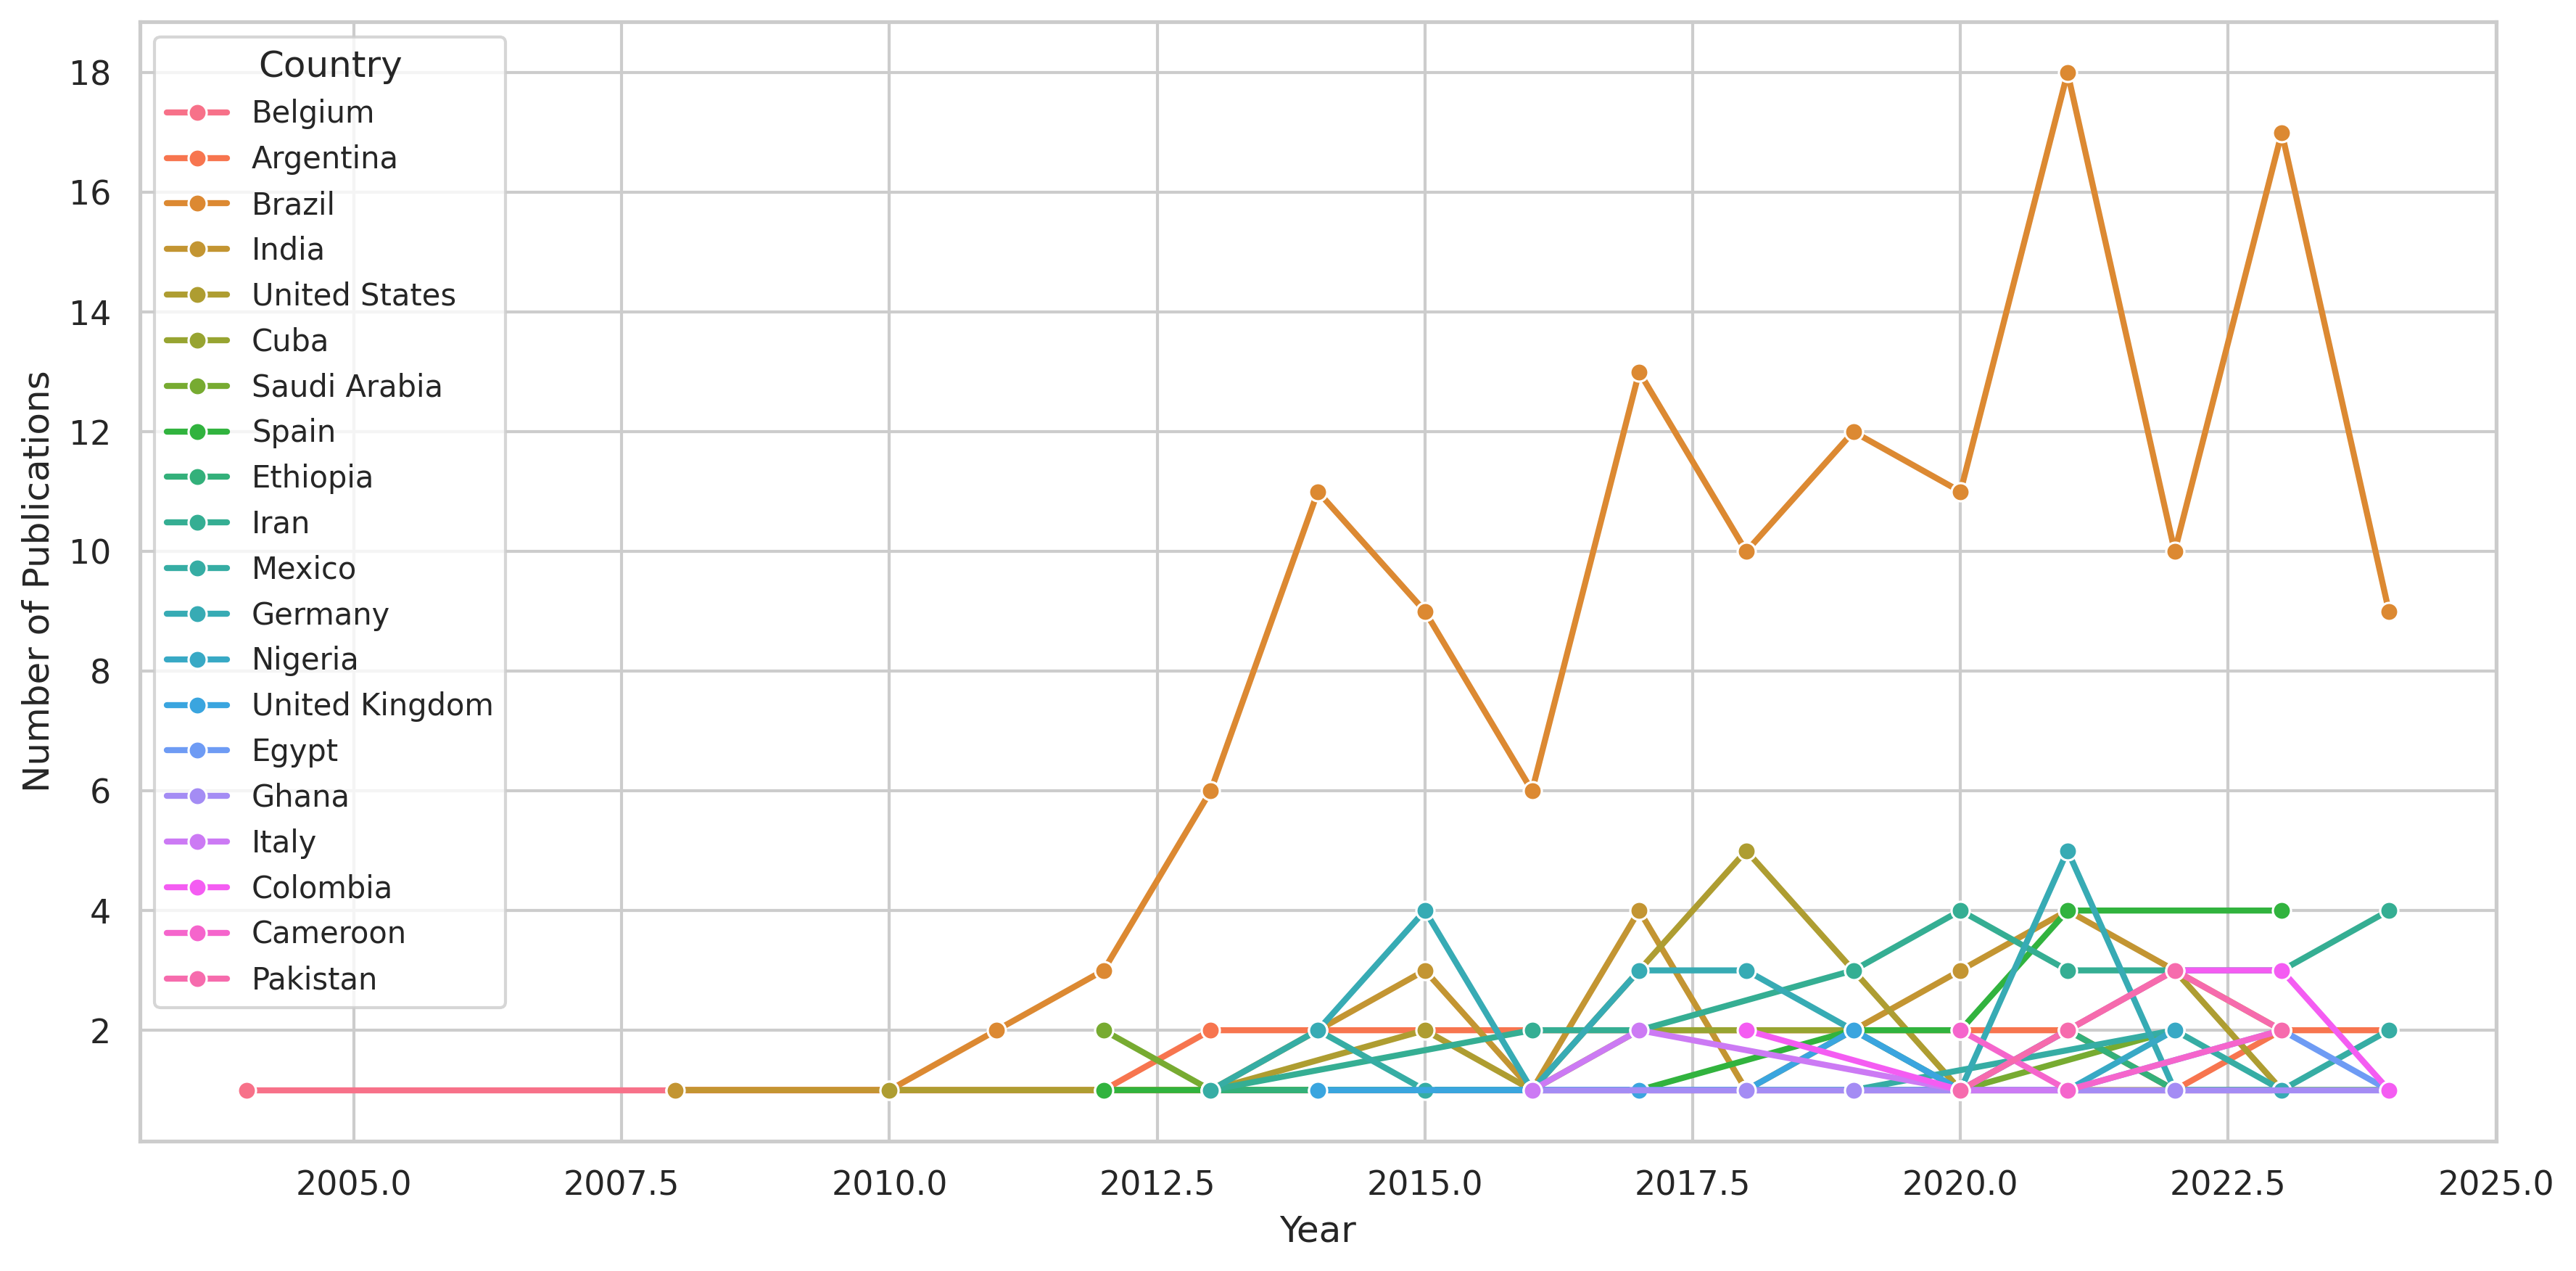

In [ ]:
# Plot the number of publications per year for the top countries
sns.set(style="whitegrid", palette="tab10")
plt.figure(figsize=(12, 6), dpi=300)
# Get the current Axes object using gca()
ax = plt.gca()  # This line is added

sns.lineplot(
    data=filtered,
    x="Year",
    y="Count",
    hue="Country",
    marker="o",
    linewidth=2
)

# Ensure y-axis has only integer values
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True)) # Updated to use plt.MaxNLocator

# Customize the plot
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Publications", fontsize=12)
plt.legend(title="Country", fontsize=10)
plt.tight_layout()
plt.show()

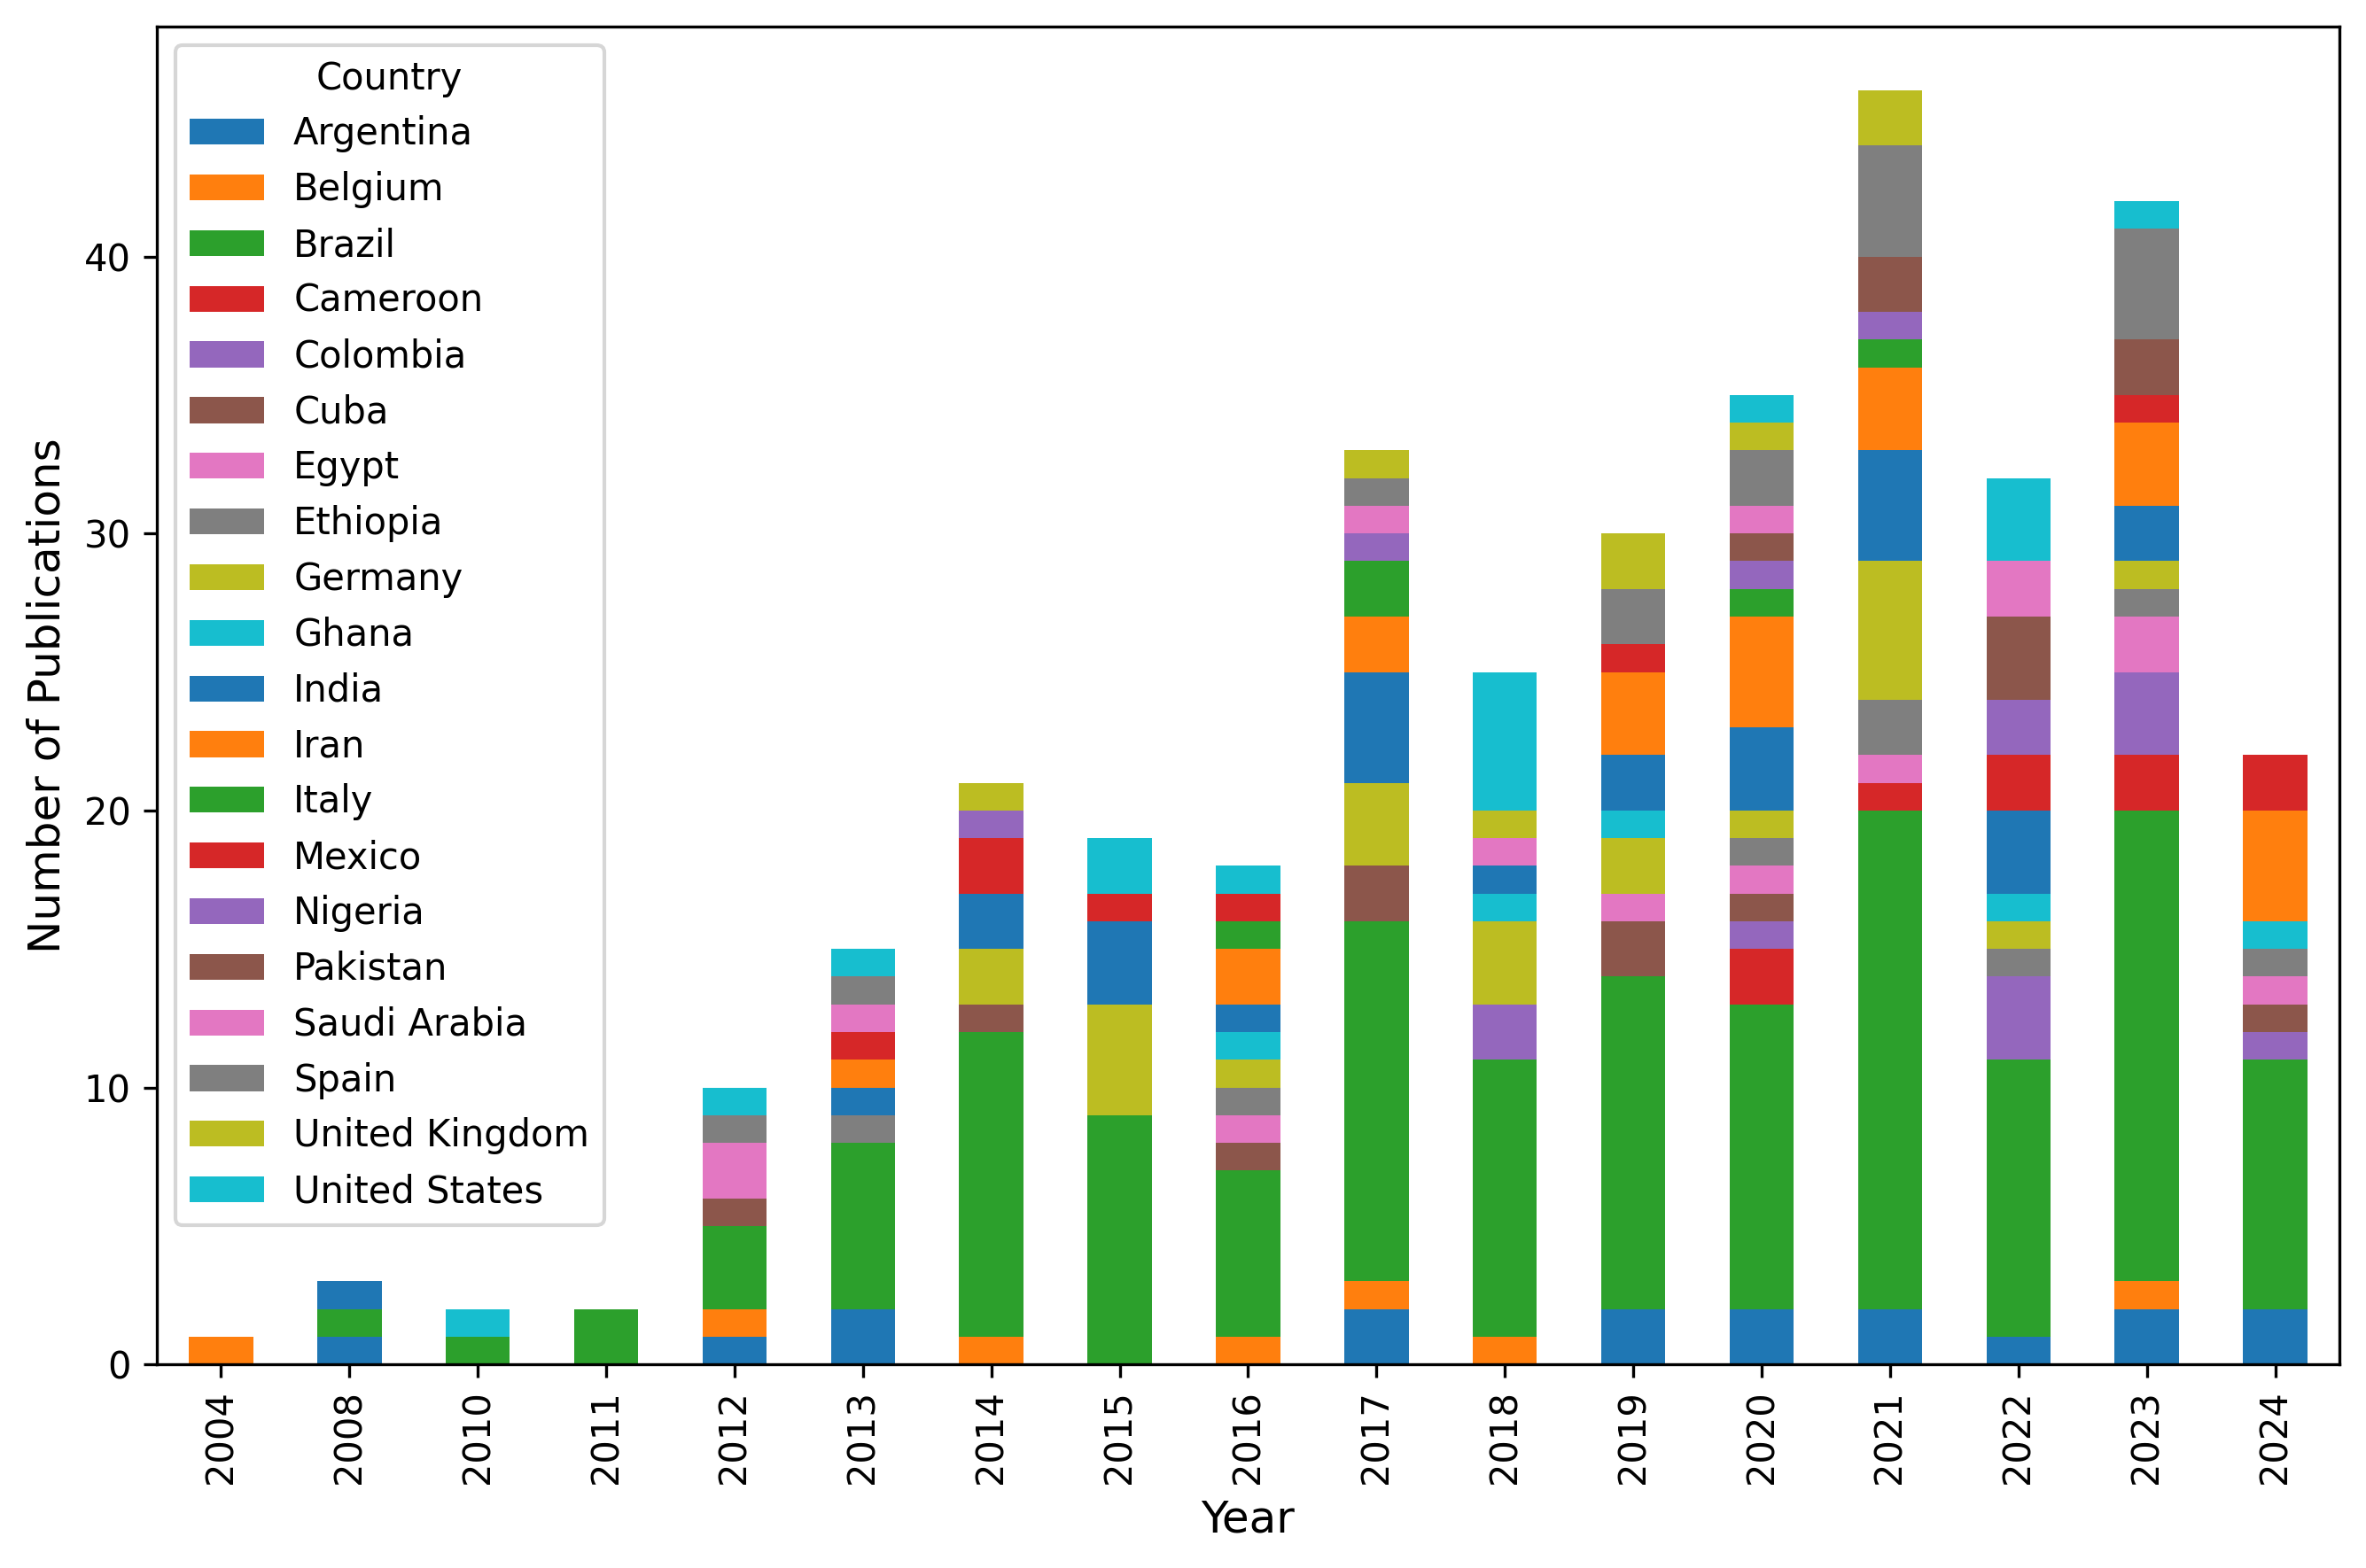

In [ ]:
# prompt: Can I get this plot as a stacked bar of Number of publications by Year (legend = Country)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/6_updated_with_country_column_supp5.csv", sep=",", encoding='latin-1')

# Filter data for the years 2000–2025
data = data[(data["Year"] >= 2000) & (data["Year"] <= 2025)]

# Group by year and country to count publications
grouped = data.groupby(["Year", "Country"]).size().reset_index(name="Count")

# Identify top 20 countries by total contributions
top_countries = grouped.groupby("Country")["Count"].sum().nlargest(20).index.tolist()

# Filter data for the top countries
filtered = grouped[grouped["Country"].isin(top_countries)]

# Create the stacked bar plot
plt.figure(figsize=(9, 6), dpi=300)
filtered.pivot(index='Year', columns='Country', values='Count').plot(kind='bar', stacked=True, ax=plt.gca())

# Customize the plot
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Publications", fontsize=12)
plt.legend(title="Country", fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import ast

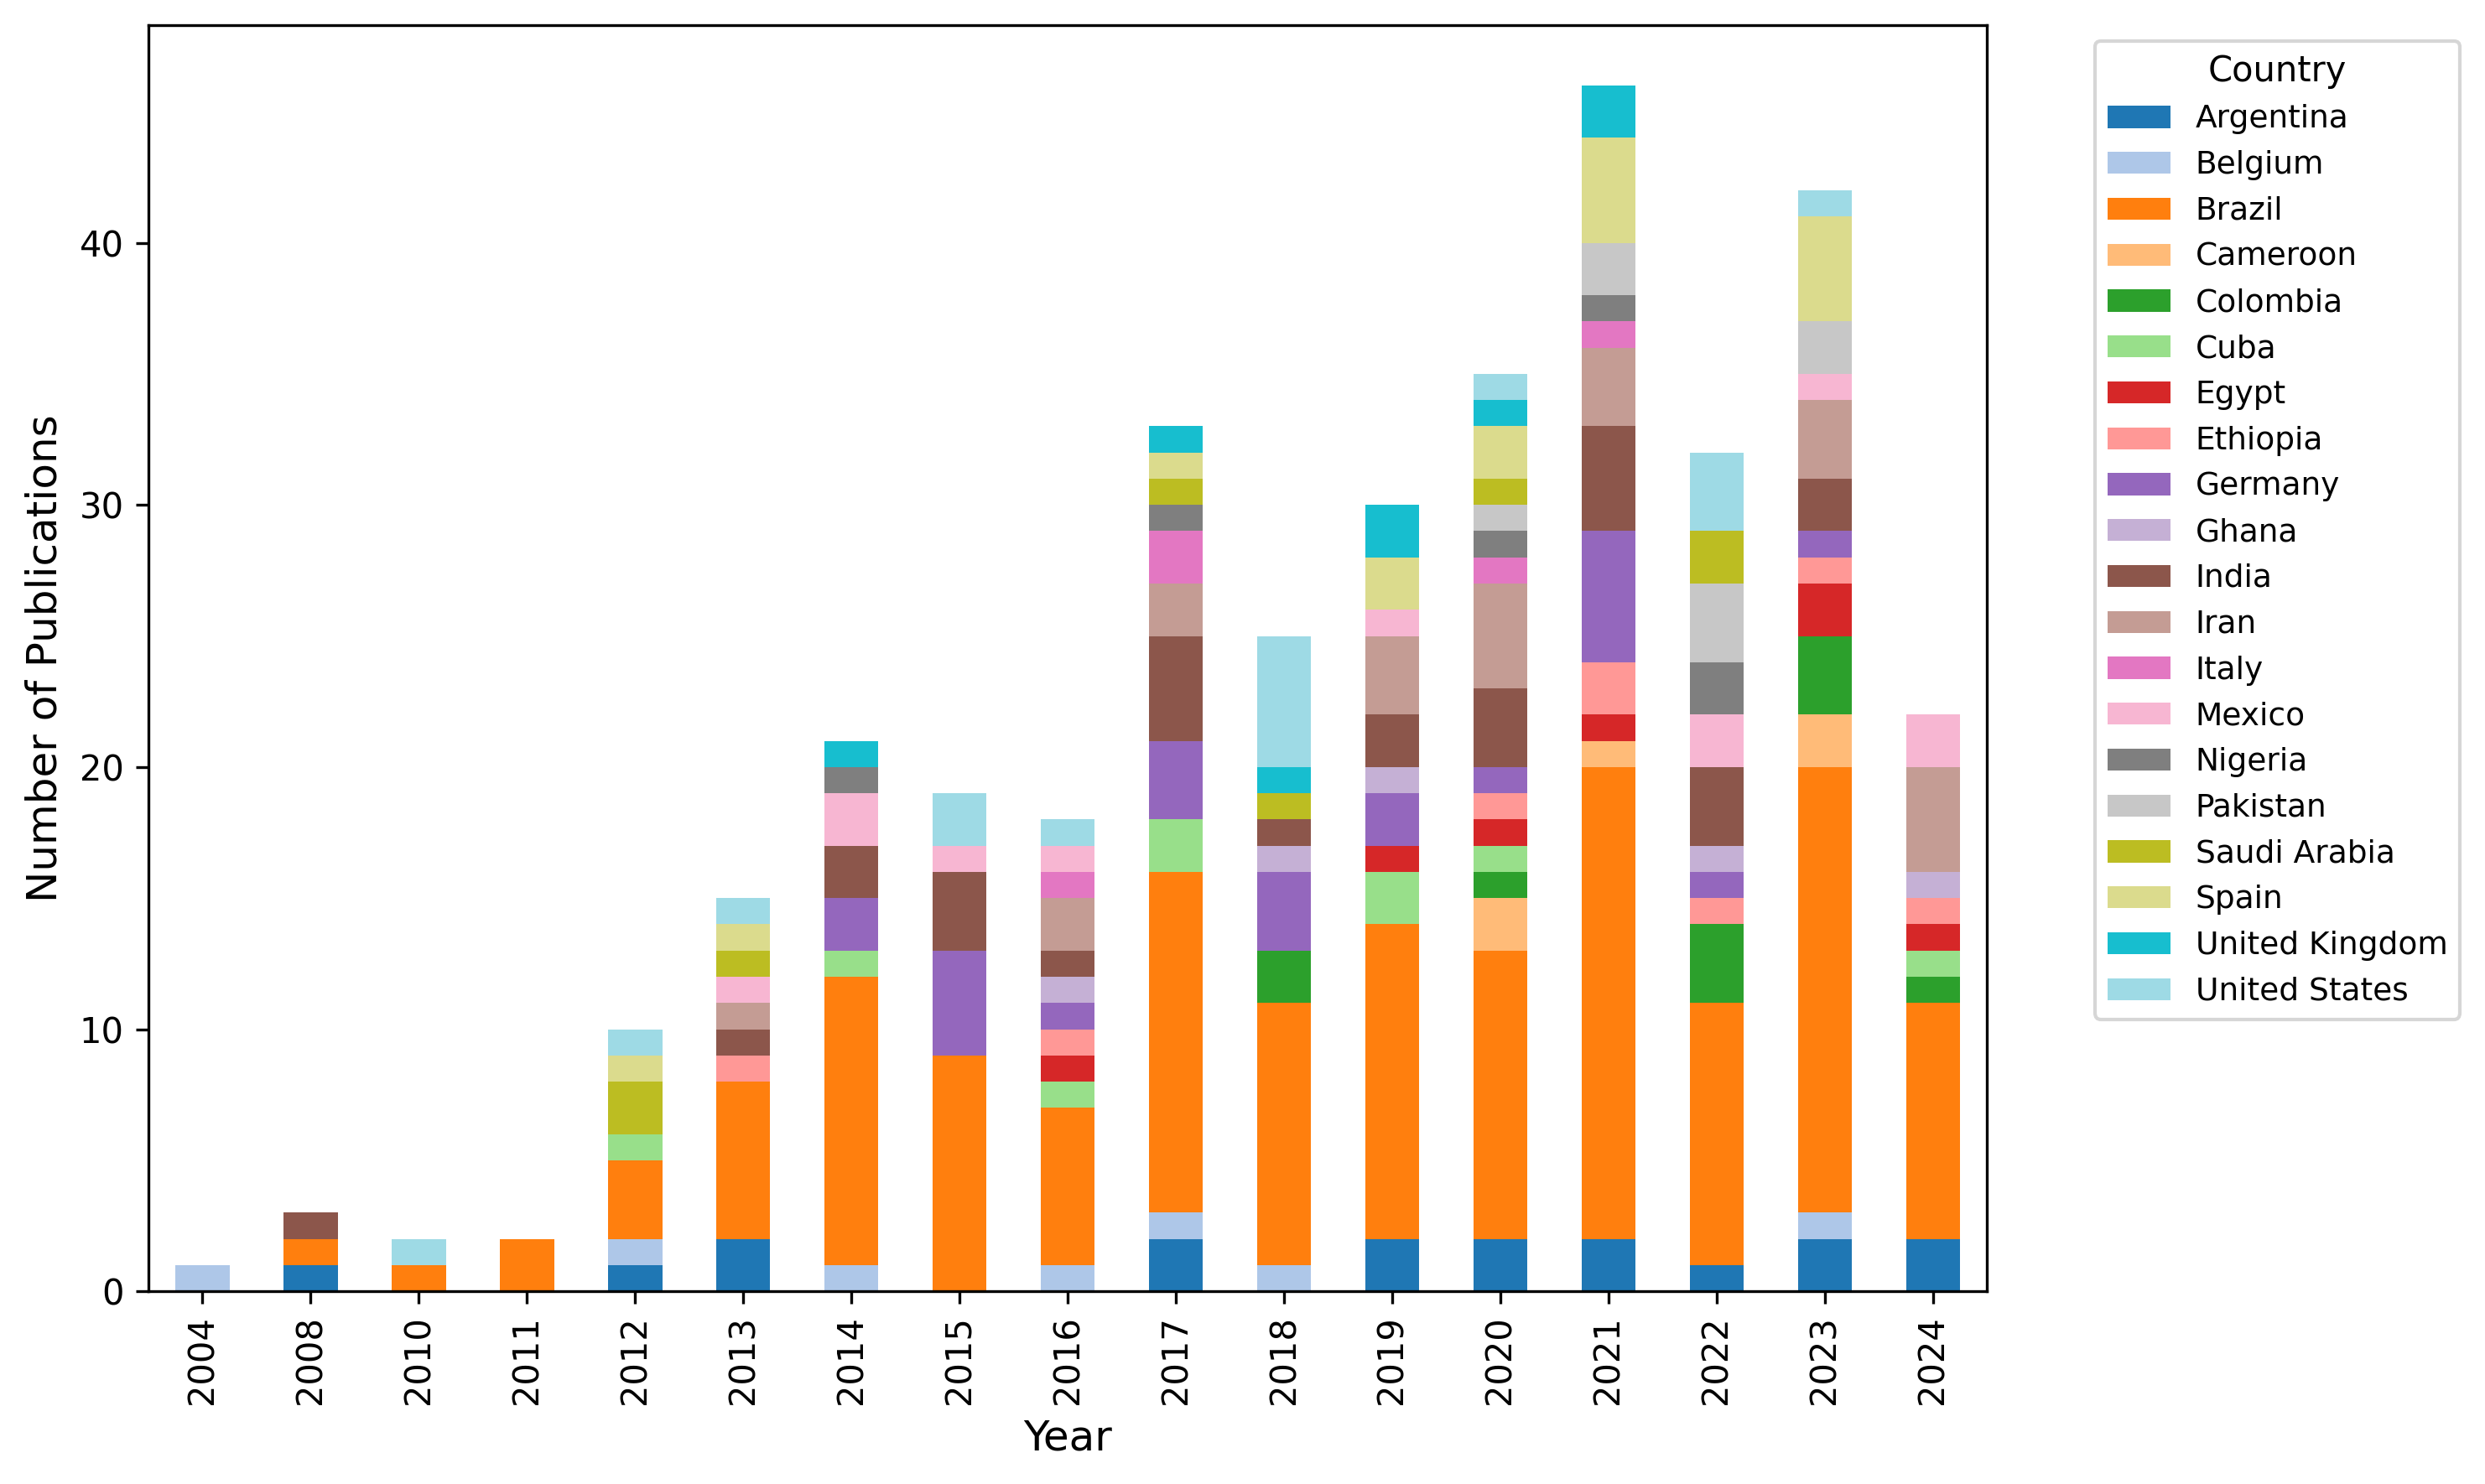

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/6_updated_with_country_column_supp5.csv", sep=",", encoding='latin-1')

# Filter data for the years 2000–2025
data = data[(data["Year"] >= 2000) & (data["Year"] <= 2025)]

# Group by year and country to count publications
grouped = data.groupby(["Year", "Country"]).size().reset_index(name="Count")

# Identify top 20 countries by total contributions
top_countries = grouped.groupby("Country")["Count"].sum().nlargest(20).index.tolist()

# Filter data for the top countries
filtered = grouped[grouped["Country"].isin(top_countries)]

# Pivot table
pivot_df = filtered.pivot(index="Year", columns="Country", values="Count").fillna(0)

# === FORCE DISTINCT COLORS ===
num_countries = len(pivot_df.columns)
cmap = plt.get_cmap("tab20")     # 20 distinct colors
colors = [cmap(i) for i in range(num_countries)]

# === Plot ===
plt.figure(figsize=(10, 6), dpi=300)
pivot_df.plot(
    kind="bar",
    stacked=True,
    color=colors,
    ax=plt.gca()
)

# Customize the plot
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Publications", fontsize=12)
#plt.title("Number of Publications by Year (Top 20 Countries)", fontsize=14, weight="bold")
plt.legend(title="Country", fontsize=9, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(False)

plt.show()

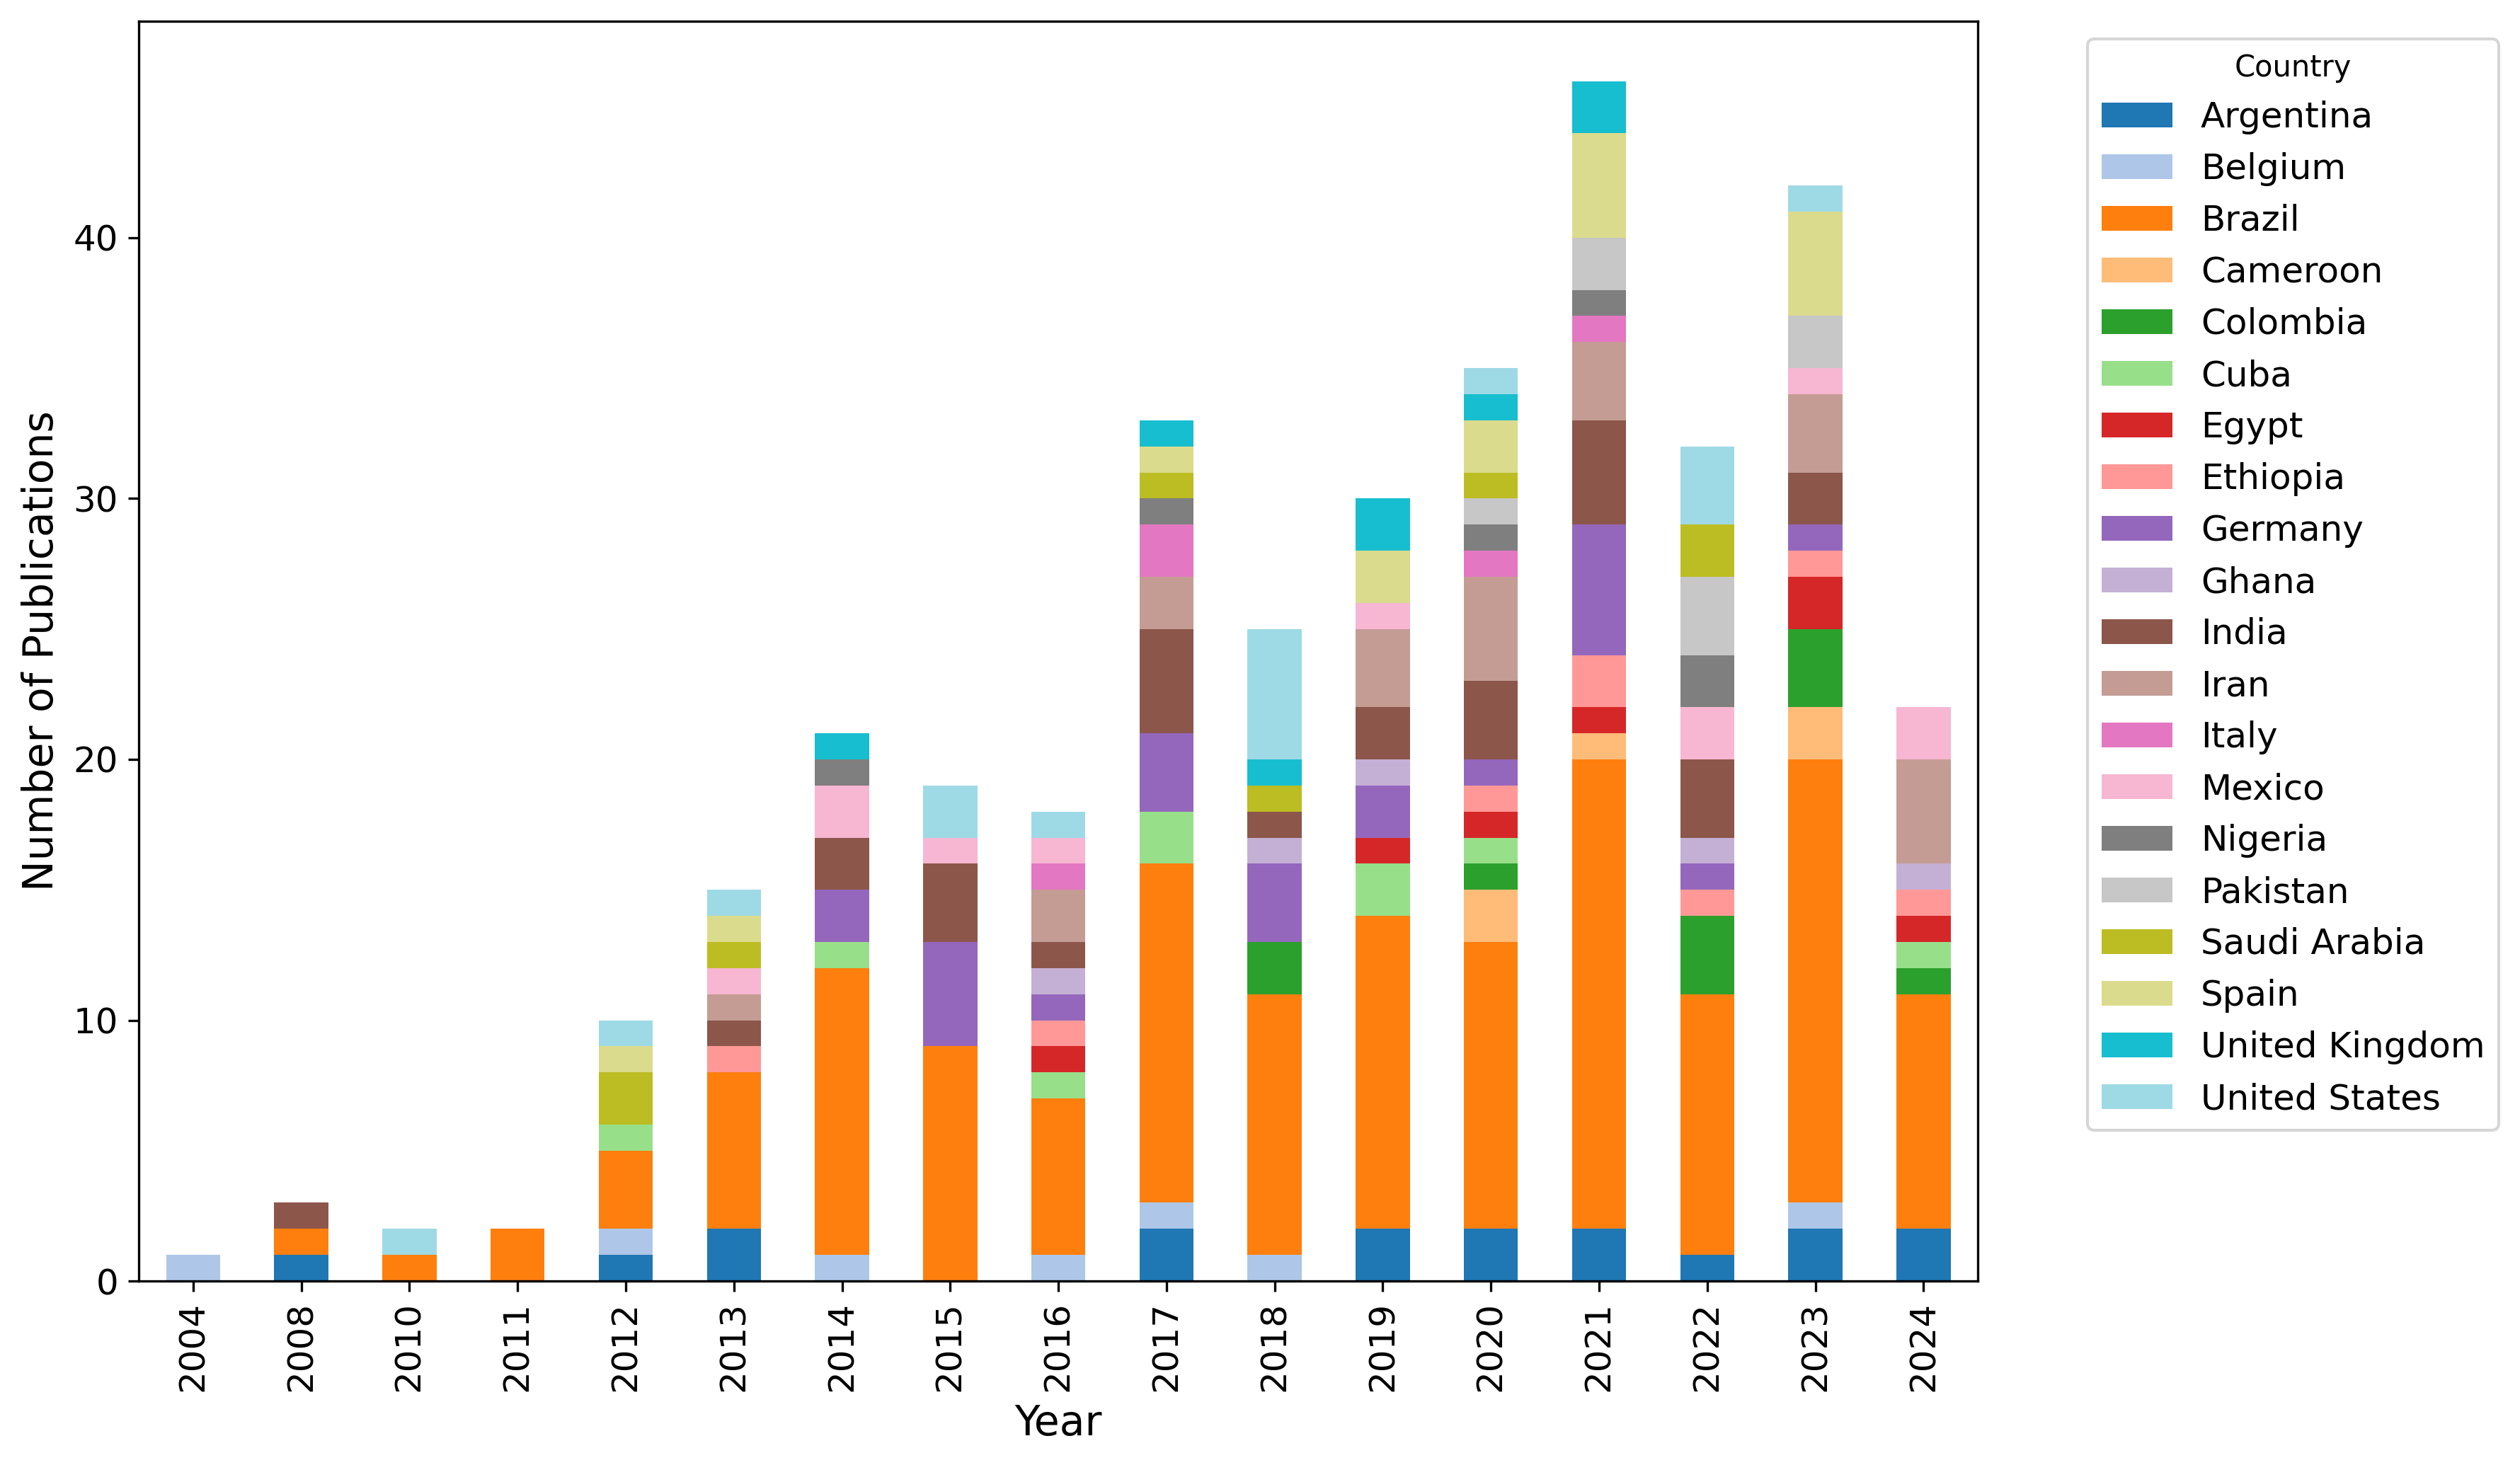

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
data = pd.read_csv("/content/6_updated_with_country_column_supp5.csv", sep=",", encoding='latin-1')

# Filter to 2000–2025
data = data[(data["Year"] >= 2000) & (data["Year"] <= 2025)]

# Group: publications per year per country
grouped = data.groupby(["Year", "Country"]).size().reset_index(name="Count")

# Top 20 countries
top_countries = grouped.groupby("Country")["Count"].sum().nlargest(20).index.tolist()

filtered = grouped[grouped["Country"].isin(top_countries)]

# Pivot table for stacked bar
pivot_df = filtered.pivot(index="Year", columns="Country", values="Count").fillna(0)

# ===== DISTINCT COLORS (40 unique hues) =====
cmap1 = plt.get_cmap("tab20")
cmap2 = plt.get_cmap("tab20b")

combined_colors = [cmap1(i) for i in range(20)] + [cmap2(i) for i in range(20)]
colors = combined_colors[:len(pivot_df.columns)]

# ===== PLOT =====
plt.figure(figsize=(12, 7), dpi=300)

pivot_df.plot(kind="bar", stacked=True, color=colors, ax=plt.gca(), linewidth=0.3)

plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Publications", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.title("Number of Publications by Year (Top 20 Countries)", fontsize=14, weight="bold")

# Legend outside plot
plt.legend(title="Country", fontsize=12, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(False)
plt.tight_layout()
plt.show()